# Tutorial 1: Hospital
## 1. Specify Input

In [1]:
data_path = 'data/hospital.csv'
out_path = 'results/'
out_dc_name = 'hospital_constraints.txt'
GLD = True

## 2. Initialize Model and Load Data

In [2]:
from profiler.profiler import Profiler
from profiler.detector.helper import process_heatmap
import datetime
import os

In [3]:
session = 'demo'

In [4]:
pf = Profiler(use_db=False, ID=session)

INFO:profiler.utility:[2.86102294922e-06] START



In [5]:
# preprocess: if set to true, it will drop empty columns
# [ !!! ] parameters are effective only when preprocess set to TRUE:
# dropna: if set to true, it will drop any tuple with null values
# dropcol: drop columns by list of column names
pf.load_data(input_type='file', path=data_path, use_embedding=False,
             preprocess=True, dropna=False, dropcol=['Address3'])

INFO:profiler.utility:[0.0151770114899] Preprocess Data start

INFO:profiler.dataEngine:Loaded table
INFO:profiler.dataEngine:Preprocessing Data...
INFO:profiler.dataEngine:inferred types of attributes: {
    "City": "categorical", 
    "Stateavg": "categorical", 
    "Address1": "categorical", 
    "Address2": "categorical", 
    "ZipCode": "categorical", 
    "HospitalOwner": "categorical", 
    "Sample": "categorical", 
    "State": "categorical", 
    "Score": "categorical", 
    "PhoneNumber": "categorical", 
    "Condition": "categorical", 
    "ProviderNumber": "categorical", 
    "CountyName": "categorical", 
    "EmergencyService": "categorical", 
    "MeasureName": "categorical", 
    "HospitalName": "categorical", 
    "MeasureCode": "categorical", 
    "HospitalType": "categorical"
}
INFO:profiler.dataEngine:Table has 18 attributes and 999 tuples
INFO:profiler.utility:[0.0551359653473] Preprocess Data execution time: 0.0399589538574



## 3. Run GLD

In [6]:
# save_heatmap: options are 'csv' and 'none'
# alpha_cov: parameter controlling sparsity of gl model
# differences: is set to true, doing training data transformation
# params for GLD only:
# sample_frac: take samples with certain fraction when creating training data in each iteration
# total_frac: take samples of training data after concatenating all training data
model_run_time = pf.run_graphical_lasso(hm_path=out_path, save_heatmap='csv',
                                        sample_frac=1, total_frac=1,
                                        alpha_cov=0.01, differences=GLD,
                                        decompose=True, undirected=False,
                                        use_cov=True, use_corr=True)

INFO:profiler.utility:[0.0750179290771] Create Training Data start

INFO:profiler.dataEngine:Creating Joint Training Data (total_frac = 1.000000, sample_frac = 1.000000)
INFO:profiler.dataEngine:multiplier: 18
100%|██████████| 18/18 [00:00<00:00, 162.25it/s]
INFO:profiler.dataEngine:Training data size: (17964, 37)
INFO:profiler.detector.glassodetector:Treat ProviderNumber as categorical
INFO:profiler.detector.glassodetector:Treat HospitalName as categorical
INFO:profiler.detector.glassodetector:Treat Address1 as categorical
INFO:profiler.detector.glassodetector:Treat Address2 as categorical
INFO:profiler.detector.glassodetector:Treat City as categorical
INFO:profiler.detector.glassodetector:Treat State as categorical
INFO:profiler.detector.glassodetector:Treat ZipCode as categorical
INFO:profiler.detector.glassodetector:Treat CountyName as categorical
INFO:profiler.detector.glassodetector:Treat PhoneNumber as categorical
INFO:profiler.detector.glassodetector:Treat HospitalOwner as cate

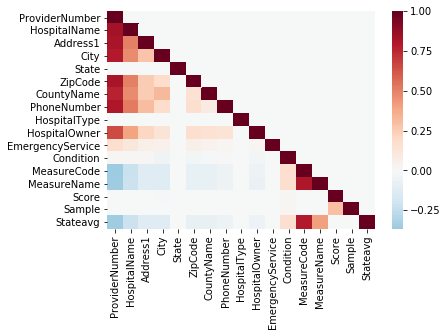

In [10]:
# if there has no outputs, just rerun this cell
pf.visualize_heatmap(pf.heatmap['cov'], save=False, title=None, filename="hospital_heatmap.png")

## 4. Generate FDs

In [8]:
# out_dc: if set to true, will write dcs to file specified by out_path and out_name
# display: if set to true, will print FD in the format of LHS -> RHS

# above_threshold and topk are exclusive options!
# above_threshold: if set to true, will filter the heatmaps with certain threshold, then output FDs
# t0: threshold when above_threshold set to true
# topk: if set to true, will output FDs with dimension up to k on the LHS

space, time, count = process_heatmap(pf.heatmap['cov'], out_dc=False, outfile=os.path.join(out_path, out_dc_name),
                                     normalize=False, take_abs=True, subsets=False,
                                     above_threshold=True, t0=0.2, 
                                     topk=False, k=6,
                                     display=True)

INFO:profiler.helper:Execution Time: 0.00974202156067 Output 11 Candidates


[ProviderNumber] -> [HospitalName]
[ProviderNumber,HospitalName] -> [Address1]
[ProviderNumber,HospitalName,Address1] -> [City]
[ProviderNumber,HospitalName,Address1] -> [ZipCode]
[ProviderNumber,HospitalName,Address1,City] -> [CountyName]
[ProviderNumber,HospitalName,Address1] -> [PhoneNumber]
[ProviderNumber,HospitalName,Address1] -> [HospitalOwner]
[ProviderNumber,HospitalName] -> [MeasureCode]
[ProviderNumber,HospitalName,MeasureCode] -> [MeasureName]
[Score] -> [Sample]
[ProviderNumber,HospitalName,MeasureCode,MeasureName] -> [Stateavg]


In [9]:
space, time, count = process_heatmap(pf.heatmap['cov'], out_dc=True, outfile=os.path.join(out_path, session + '_' +out_dc_name),
                                     normalize=False, take_abs=True, subsets=True,
                                     above_threshold=True, t0=0.2, 
                                     topk=False, k=6,
                                     display=True)

INFO:profiler.helper:Execution Time: 0.0192959308624 Output 73 Candidates


[ProviderNumber] -> [HospitalName]
[ProviderNumber] -> [Address1]
[HospitalName] -> [Address1]
[ProviderNumber,HospitalName] -> [Address1]
[ProviderNumber] -> [City]
[HospitalName] -> [City]
[Address1] -> [City]
[ProviderNumber,HospitalName] -> [City]
[ProviderNumber,Address1] -> [City]
[HospitalName,Address1] -> [City]
[ProviderNumber,HospitalName,Address1] -> [City]
[ProviderNumber] -> [ZipCode]
[HospitalName] -> [ZipCode]
[Address1] -> [ZipCode]
[ProviderNumber,HospitalName] -> [ZipCode]
[ProviderNumber,Address1] -> [ZipCode]
[HospitalName,Address1] -> [ZipCode]
[ProviderNumber,HospitalName,Address1] -> [ZipCode]
[ProviderNumber] -> [CountyName]
[HospitalName] -> [CountyName]
[Address1] -> [CountyName]
[City] -> [CountyName]
[ProviderNumber,HospitalName] -> [CountyName]
[ProviderNumber,Address1] -> [CountyName]
[ProviderNumber,City] -> [CountyName]
[HospitalName,Address1] -> [CountyName]
[HospitalName,City] -> [CountyName]
[Address1,City] -> [CountyName]
[ProviderNumber,HospitalName